# 工具包ChenxiLexicalAnalysis功能展示
## 运行环境
### numpy 1.18.5

### CRFPP

### matplotlib 3.2.2

### sklearn.metrics

## 零、模块导入

In [7]:
from NER import NER, BatchNER, DemoCRFNER, DemoHMMNER
from Pos import Tagging, BatchTagging, PosTagDemo
from Seg import DictSegment, StatisticSegment, BatchSeg, DemoSeg

## 一、分词
使用了HMM,N-最短路，随机化N-最短路以及逆向最大匹配等四种分词算法

### 1.1 单句分词调用接口
输入一个字符串，打印分词结果

In [8]:
s='于是我们奋力前进,却如同逆水行舟,注定要不断地退回过去。'

In [9]:
#基于辞典的方法
#反向最大匹配
print(DictSegment(s,mode='RMM'))

#N-最短路分词
print(DictSegment(s,mode='DAG'))

#N-最短路分词(随机回溯路径)
print(DictSegment(s,mode='RDAG'))

#基于统计的方法
#隐马尔可夫分词
print(StatisticSegment(s))

于是 我们 奋力 前进 , 却 如同 逆水行舟 , 注定 要 不断 地 退回 过去 。 
于是 我们 奋力 前进 , 却 如同 逆水行舟 , 注定 要 不断 地 退回 过去 。 
于是 我们 奋力 前进 , 却 如同 逆水行舟 , 注定 要 不断 地 退回 过去 。 
于 是 我们 奋力 前 进, 却 如同 逆水 行舟 , 注定 要 不断 地退 回过 去 。 


### 1.2 批量分词调用接口

输入一个文本文件，输出分词结果，保存在txt文件中

分词结果请在路径./result/Seg文件夹下的相关文件中查看

In [10]:
#原始文本文件所在路径
inpath='./corpus/segment/test5_SEG+POSTAG.txt'

In [11]:
outpath='./result/Seg/HMMSegResult.txt'
BatchSeg(mode='HMM',path=inpath,outpath=outpath)

outpath='./result/Seg/DAGSegResult.txt'
BatchSeg(mode='DAG',path=inpath,outpath=outpath)
                 
outpath='./result/Seg/RDAGSegResult.txt'
BatchSeg(mode='RDAG',path=inpath,outpath=outpath)

outpath='./result/Seg/HMMSegResult.txt'
BatchSeg(mode='HMM',path=inpath,outpath=outpath)

Using HMM
Training complete in 0m 2s
segment speed is 257.1079779823241 kb/s
Using DAG
Training complete in 0m 2s
segment speed is 208.87647442638806 kb/s
Using SDAG
Training complete in 0m 3s
segment speed is 202.9100693401948 kb/s
Using HMM
Training complete in 0m 2s
segment speed is 254.8305414489906 kb/s


### 1.3 分词算法性能测评
以下分别展示本项目所实现的4种分词方法：

HMM,N-最短路，随机化N-最短路以及逆向最大匹配的性能

默认测评文本文件为corpus/segment/test5_SEG+POSTAG.txt，大小519kb

内容来自人民日报语料库的后4296行

In [12]:
DemoSeg()

Using HMM
Training complete in 0m 3s
segment speed is 203.43079548364307 kb/s
Precision=80.39258102744493,Recall=80.55547701848134,F1=80.47394658921334,OOVRecall=52.351331176909675,IVRecall=81.66581772588356

Using DAG
Training complete in 0m 2s
segment speed is 223.72384761102927 kb/s
Precision=89.98014163817884,Recall=93.51974893268115,F1=91.71580679150415,OOVRecall=2.114953968648918,IVRecall=97.11817255700964

Using RandomDAG
Training complete in 0m 2s
segment speed is 218.73017029019147 kb/s
Precision=89.88855741242826,Recall=93.42456199873712,F1=91.62245595874077,OOVRecall=2.114953968648918,IVRecall=97.01923830420813

Using RMM
Training complete in 0m 1s
segment speed is 689.2554481051873 kb/s
Precision=89.87574656286536,Recall=93.46037490457746,F1=91.63301701117138,OOVRecall=2.114953968648918,IVRecall=97.05646109239088


## 二、词性标注
使用了HMM和CRF++两种算法

### 2.1 单句标注调用接口
输入一个预分词字符串，打印词性标注结果

In [13]:
#预分词字符串
s='多 年 以后 ， 奥雷连诺 上校 站 在 行刑队 面前 ， 准 会 想起 父亲 带 他 去 参观 冰块 的 那个 遥远 的 下午 。'

In [14]:
#HMM词性标注
print(Tagging(s,mode='HMM'))

#CRF词性标注
print(Tagging(s,mode='CRF'))

多/m 年/q 以后/f ，/w 奥雷连诺/n 上校/w 站/v 在/p 行刑队/n 面前/f ，/w 准/v 会/v 想起/v 父亲/n 带/v 他/r 去/v 参观/v 冰块/n 的/u 那个/r 遥远/a 的/u 下午/t 。/w 
多/a 年/q 以后/f ，/w 奥雷连诺/v 上校/n 站/v 在/p 行刑队/n 面前/f ，/w 准/v 会/v 想起/v 父亲/r 带/v 他/r 去/v 参观/v 冰块/v 的/r 那个/u 遥远/a 的/u 下午/n 。/w 


### 2.2 批量标注调用接口
输入一个文本文件，输出词性标注结果，保存在txt文件中

分词结果请在路径./result/PosTag下的相关文件中查看

In [15]:
#预分词文本文件所在路径，此处使用逆向最大匹配算法的分词结果
inpath = './corpus/segment/RMMSegment.txt'

In [16]:
#CRF++词性标注
outpath = './result/Pos/CRFPosResult.txt'
BatchTagging(mode='CRF',path=inpath,outpath=outpath)

In [17]:
#HMM词性标注
outpath = './result/Pos/HMMPosResult.txt'
BatchTagging(mode='HMM',path=inpath,outpath=outpath)

### 2.3 词性标注算法性能测评
以下分别展示CRF++和HMM词性标注的性能

默认测评文本文件为/corpus/segment/RMMsegment

系之前分词模块运行逆向最大匹配算法得到的分词结果，大小626kb

CRFPosTag complete in 0m 2s
CRFPosTag speed is 274.4549887051164 kb/s
The whole precision is 80.9759937484917.
Tag f:
Precision:0.8084808946877913	Recall:0.8277671755725191
Tag z:
Precision:0.8020304568527918	Recall:0.3534675615212528
Tag n:
Precision:0.8035211554939002	Recall:0.8444172883972215
Tag o:
Precision:1.0	Recall:0.06896551724137931
Tag q:
Precision:0.8166318719554627	Recall:0.8880060537268256
Tag c:
Precision:0.7230818826563508	Recall:0.8027916964924839
Tag ad:
Precision:0.7701525054466231	Recall:0.7803532008830022
Tag nx:
Precision:0.9506172839506173	Recall:0.6754385964912281
Tag vd:
Precision:0.8666666666666667	Recall:0.5777777777777777
Tag u:
Precision:0.7976219965320783	Recall:0.8805031446540881
Tag l:
Precision:0.9113300492610837	Recall:0.49377224199288255
Tag i:
Precision:0.9035019455252918	Recall:0.5387470997679814
Tag p:
Precision:0.7469825659365221	Recall:0.8025936599423631
Tag nz:
Precision:0.778175313059034	Recall:0.46178343949044587
Tag ns:
Precision:0.8744302308

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=['f', 'z', 'n', 'o', 'q', 'c', 'ad', 'nx', 'vd', 'u', 'l', 'i', 'p', 'nz', 'ns', 'b', 'w', 'nr', 'r', 'y', 'h', 'an', 'd', 's', 't', 'v', 'k', 'j', 'm', 'e', 'nt', 'a', 'vn'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


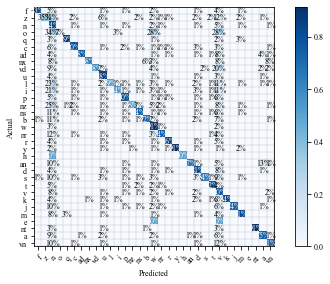

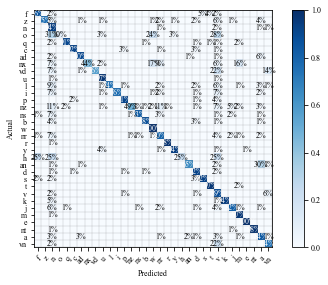

In [18]:
PosTagDemo()

## 三、命名实体识别
本项目主要针对人名(nr)、地名(ns)、机构名(nt)进行识别

使用了HMM和CRF++两种算法

### 3.1 单句NER调用接口
输入一个预分词字符串，打印NER结果

In [19]:
#预分词字符串
s = '联合国 总部 在 美国 纽约 ， 在 瑞士 日内瓦 、 奥地利 维也纳 、 肯尼亚 内罗毕 、 泰国 曼谷 、 埃塞俄比亚 亚的斯亚贝巴 、 黎巴嫩 贝鲁特 、 智利 圣地亚哥 设 有 办事处 ， 首席 行政 长官 是 联合国 秘书长 ， 现 由 安东尼 古特雷斯 担任 。'

In [20]:
#CRF++
NER(s,mode='CRF')


人名: 埃塞俄比亚亚的斯亚贝巴  
地名: 黎巴嫩  瑞士日内瓦  智利圣地亚哥  泰国  肯尼亚内罗毕  美国纽约  奥地利维也纳  
机构名: 联合国  联合国  

In [21]:
#HMM
NER(s,mode='HMM')


人名: 
地名: 埃塞俄比亚  瑞士日内瓦  智利圣地亚哥  黎巴嫩贝鲁特  肯尼亚内罗毕  泰国曼谷  美国纽约  奥地利维也纳  
机构名: 联合国  联合国  

### 3.2批量识别调用接口
输入一个文本文件，输出NER结果，保存在txt文件中

分词结果请在路径./result/NER下的相关文件中查看

In [22]:
#预分词文本文件所在路径，此处使用逆向最大匹配算法的分词结果
path = './corpus/segment/RMMSegment.txt'

In [23]:
#CRF++
out = './result/NER/CRFNERout.txt'
BatchNER(mode='CRF', path=path, outpath=out)

In [24]:
#HMM
out = './result/NER/HMMNERout.txt'
BatchNER(mode='HMM', path=path, outpath=out)

### 3.3NER算法性能测评
默认测评文本文件仍为/corpus/segment/RMMsegment

In [25]:
print('Using CRF')
DemoCRFNER()

Using CRF
对于人名实体的识别准确率为:81.67680865449628% ,召回率为63.47871781397792% ,F1-measure=71.43701951507983% 
对于地名实体的识别准确率为:91.15367077063384 ,召回率为64.07051282051283 ,F1-measure=75.24938829286654% 
对于机构名实体的识别准确率为:96.88888888888889 ,召回率为56.770833333333336 ,F1-measure=71.5927750410509% 


In [26]:
print('Using HMM')
DemoHMMNER()

Using HMM
对于人名实体的识别准确率为:59.709009513150534% ,召回率为56.06936416184971% ,F1-measure=57.8319783197832% 
对于地名实体的识别准确率为:90.76923076923077 ,召回率为68.07692307692308 ,F1-measure=77.80219780219781% 
对于机构名实体的识别准确率为:96.9298245614035 ,召回率为57.552083333333336 ,F1-measure=72.22222222222221% 
